In [1]:
#import librerias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, save_model, load_model
from keras.layers import Dense

In [2]:
df = pd.read_csv('bankloan.csv')
df = df.dropna()
df.isna().any()
df = df.drop('Loan_ID', axis=1)
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)

In [3]:
#inbalanced dataset
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [4]:
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status', axis=1)

#OneHotEncoder
dm_X = pd.get_dummies(pre_X)
dm_y = pre_y.map(dict(Y=1, N=0))

In [5]:
#resolving inbalanced classification with Synthetic Minority Oversampling Technique (SMOTE)  
smote = SMOTE(sampling_strategy='minority')
X1, y = smote.fit_sample(dm_X, dm_y)

#normalization (values with ranges 0-1)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [23]:
classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0)

eval_model = classifier.evaluate(X_train, y_train)
eval_model

17/17 [==============================] - 0s 762us/step - loss: 0.2509 - accuracy: 0.9153


[0.25092026591300964, 0.9152542352676392]

In [24]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.52)

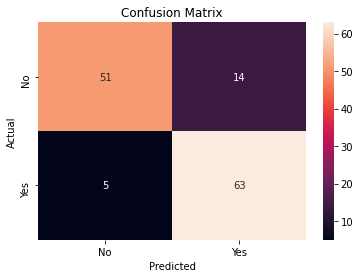

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax); #annot=True to annotate cells

ax.set_xlabel('Predicted'); ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [26]:
# Save the model
filepath = './saved_model'
save_model(classifier, filepath)

INFO:tensorflow:Assets written to: ./saved_model\assets


In [29]:
# Load the model
from tensorflow.keras.models import load_model
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

loaded_model = load_model(
    './saved_model',
    custom_objects=None,
    compile=True
)

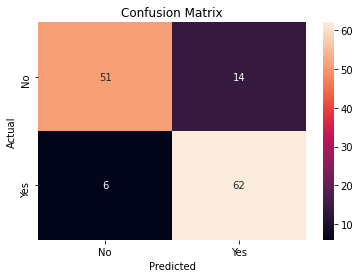

In [30]:
y_pred = loaded_model.predict(X_test)
y_pred = (y_pred>0.60)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax); #annot=True to annotate cells

ax.set_xlabel('Predicted'); ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']);